In [74]:
import pandas as pd
import requests
from pandas import json_normalize
import matplotlib.pyplot as plt

In [75]:
url = 'https://meri.digitraffic.fi/api/ais/v1/locations'
response = requests.get(url)
data = response.json()

In [76]:
df = pd.DataFrame(data)
df = json_normalize(df['features'])
df = df.rename(columns={'properties.timestamp': 'timestamp', 'properties.mmsi': 'mmsi', 'properties.navStat': 'navStat', 'properties.sog': 'sog', 'properties.cog': 'cog', 'properties.heading': 'heading', 'properties.imo': 'imo', 'properties.name': 'name', 'properties.callSign': 'callSign', 'properties.type': 'type', 'properties.a': 'a', 'properties.b': 'b', 'properties.c': 'c', 'properties.d': 'd', 'properties.draught': 'draught', 'properties.destination': 'destination', 'properties.eta': 'eta', 'properties.utcSecond': 'utcSecond'})

for column in df.columns:
    print(df[column].head(5))
    print()

        mmsi       mmsi
0  219598000  219598000
1  376128000  376128000
2  273274000  273274000
3  231319000  231319000
4  265834350  265834350

0    Feature
1    Feature
2    Feature
3    Feature
4    Feature
Name: type, dtype: object

0    Point
1    Point
2    Point
3    Point
4    Point
Name: geometry.type, dtype: object

0     [20.85169, 55.770832]
1      [19.612433, 59.1802]
2    [30.190985, 59.886713]
3    [17.597902, 56.052607]
4    [17.994855, 58.664757]
Name: geometry.coordinates, dtype: object

        mmsi       mmsi
0  219598000  219598000
1  376128000  376128000
2  273274000  273274000
3  231319000  231319000
4  265834350  265834350

0    0.1
1    6.5
2    5.3
3    1.9
4    2.9
Name: sog, dtype: float64

0    346.5
1    205.7
2     74.9
3     59.6
4    231.7
Name: cog, dtype: float64

0    1
1    3
2    0
3    3
4    0
Name: navStat, dtype: int64

0      4
1      0
2      0
3   -127
4      0
Name: properties.rot, dtype: int64

0     True
1     True
2     True
3    False
4

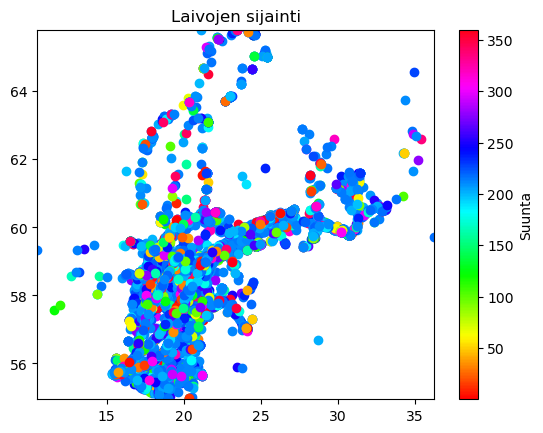

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pandas import json_normalize

df = pd.DataFrame(data)
df = json_normalize(df['features'])
df = df.rename(columns={'properties.timestamp': 'timestamp', 'properties.mmsi': 'mmsi', 'properties.navStat': 'navStat', 'properties.sog': 'sog', 'properties.cog': 'cog', 'properties.heading': 'heading', 'properties.imo': 'imo', 'properties.name': 'name', 'properties.callSign': 'callSign', 'properties.type': 'type', 'properties.a': 'a', 'properties.b': 'b', 'properties.c': 'c', 'properties.d': 'd', 'properties.draught': 'draught', 'properties.destination': 'destination', 'properties.eta': 'eta', 'properties.utcSecond': 'utcSecond'})

df = df[(df['cog'] > 0) & (df['cog'] < 360)]

df[['longitude', 'latitude']] = pd.DataFrame(df['geometry.coordinates'].tolist(), columns=['longitude', 'latitude'])

fig, ax = plt.subplots()
ax.set_xlim(min(df['longitude']), max(df['longitude']))
ax.set_ylim(min(df['latitude']), max(df['latitude']))

cog_min = min(df['cog'])
cog_max = max(df['cog'])
cmap = plt.get_cmap('hsv') 
norm = mcolors.Normalize(vmin=cog_min, vmax=cog_max)

for index, row in df.iterrows():
    lon = row['longitude']
    lat = row['latitude']
    cog = row['cog']
    normalized_cog = norm(cog)
    color = cmap(normalized_cog)
    ax.plot(lon, lat, 'o', color=color)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Suunta')

plt.title('Laivojen sijainti')
plt.show()

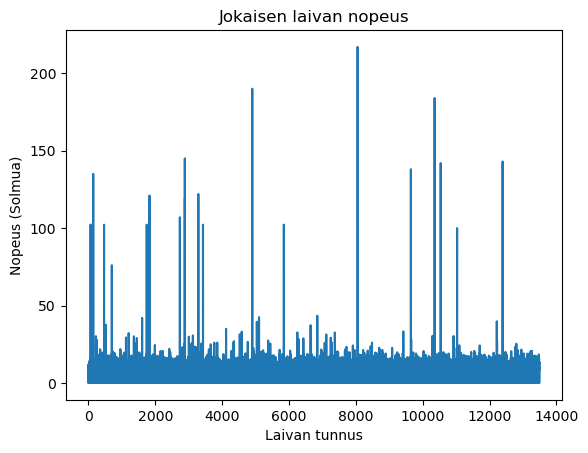

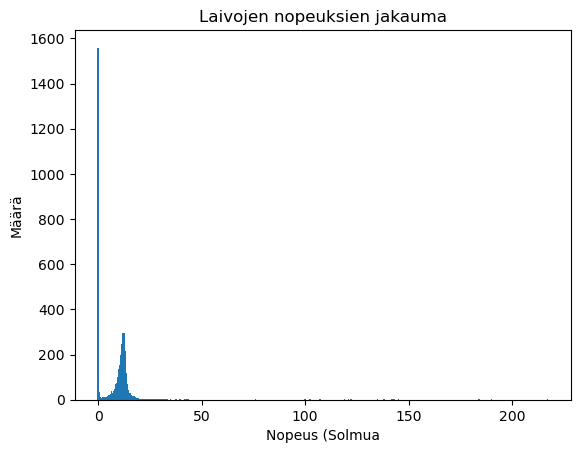

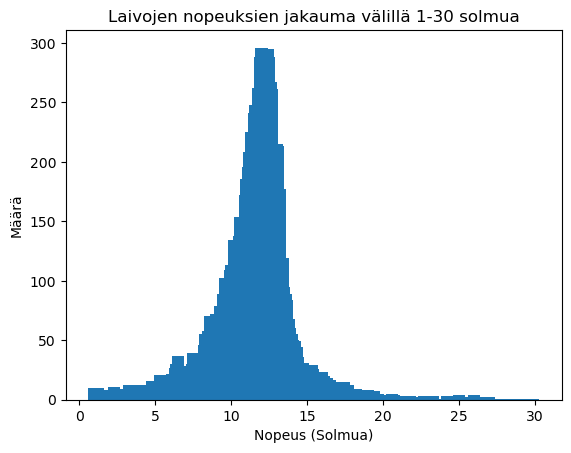

In [78]:
plt.plot(df['sog'])

plt.title('Jokaisen laivan nopeus')
plt.xlabel('Laivan tunnus')
plt.ylabel('Nopeus (Solmua)')

plt.show()

value_counts = df['sog'].value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)

plt.title('Laivojen nopeuksien jakauma')
plt.xlabel('Nopeus (Solmua')
plt.ylabel('Määrä')

plt.show()

filtered_df = df[df['sog'].between(1, 30)]

value_counts = filtered_df['sog'].value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)

plt.title('Laivojen nopeuksien jakauma välillä 1-30 solmua')
plt.xlabel('Nopeus (Solmua)')
plt.ylabel('Määrä')

plt.show()

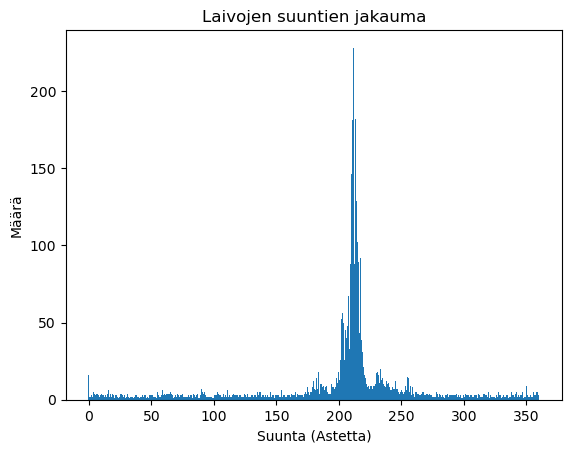

In [79]:
value_counts = df['cog'].value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)

plt.title('Laivojen suuntien jakauma')
plt.xlabel('Suunta (Astetta)')
plt.ylabel('Määrä')

plt.show()

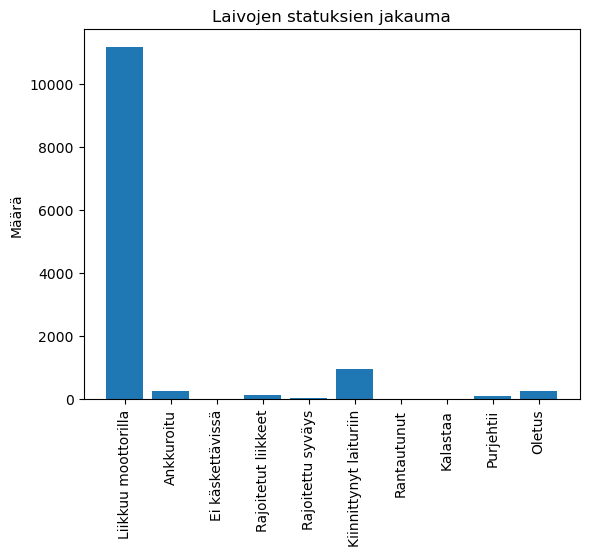

In [80]:
selitykset = {
    0: 'Liikkuu moottorilla',
    1: 'Ankkuroitu',
    2: 'Ei käskettävissä',
    3: 'Rajoitetut liikkeet',
    4: 'Rajoitettu syväys',
    5: 'Kiinnittynyt laituriin',
    6: 'Rantautunut',
    7: 'Kalastaa',
    8: 'Purjehtii',
    15: 'Oletus'
}

value_counts = df['navStat'].value_counts().sort_index()

selitykset = {k: v for k, v in selitykset.items() if k in value_counts.index}
value_counts = value_counts.loc[selitykset.keys()]

x_labels = [selitykset[numero] for numero in value_counts.index]

plt.bar(x_labels, value_counts.values)

plt.title('Laivojen statuksien jakauma')
plt.ylabel('Määrä')

plt.xticks(rotation=90)

plt.show()

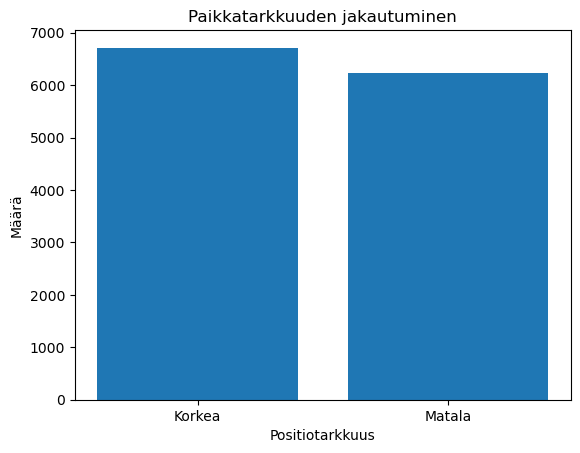

In [81]:
boolean_arvot = {
    True: 'Korkea',
    False: 'Matala'
}

value_counts = df['properties.posAcc'].map(boolean_arvot).value_counts()

plt.bar(value_counts.index, value_counts.values)

plt.title('Paikkatarkkuuden jakautuminen')
plt.xlabel('Positiotarkkuus')
plt.ylabel('Määrä')

plt.show()

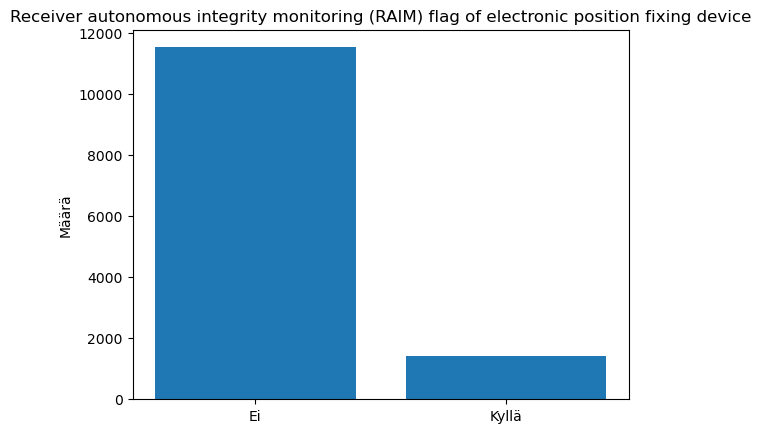

In [82]:
boolean_arvot = {
    True: 'Kyllä',
    False: 'Ei'
}

value_counts = df['properties.raim'].map(boolean_arvot).value_counts()

plt.bar(value_counts.index, value_counts.values)

plt.title('Receiver autonomous integrity monitoring (RAIM) flag of electronic position fixing device')
plt.ylabel('Määrä')

plt.show()

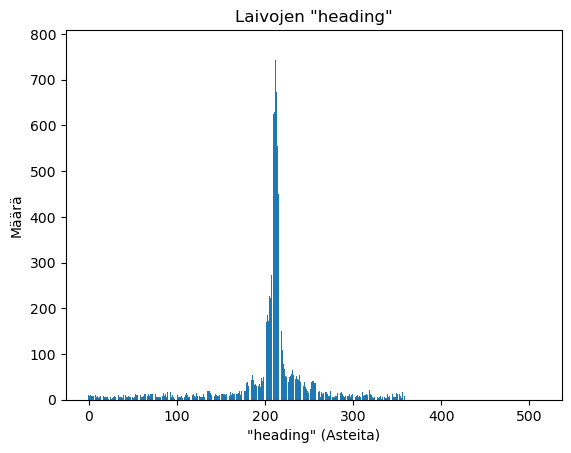

In [83]:
value_counts = df['heading'].value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)

plt.title('Laivojen "heading"')
plt.xlabel('"heading" (Asteita)')
plt.ylabel('Määrä')

plt.show()

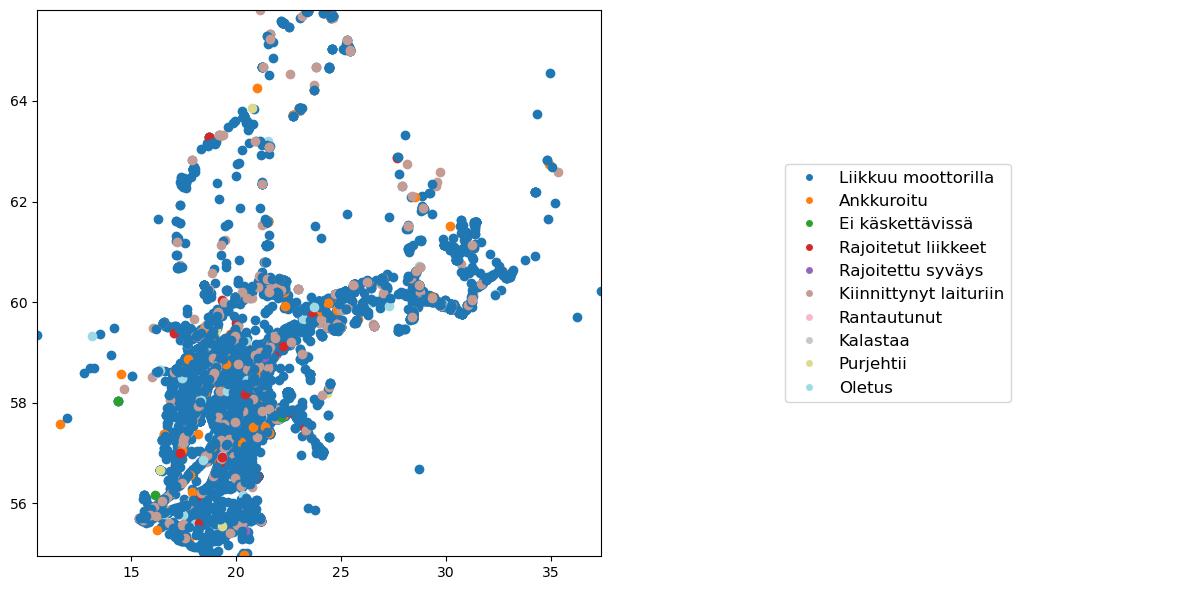

In [73]:
import matplotlib.colors as mcolors

df = pd.DataFrame(data)
df = pd.json_normalize(df['features'])
df = df.rename(columns={'properties.timestamp': 'timestamp', 'properties.mmsi': 'mmsi', 'properties.navStat': 'navStat', 'properties.sog': 'sog', 'properties.cog': 'cog', 'properties.heading': 'heading', 'properties.imo': 'imo', 'properties.name': 'name', 'properties.callSign': 'callSign', 'properties.type': 'type', 'properties.a': 'a', 'properties.b': 'b', 'properties.c': 'c', 'properties.d': 'd', 'properties.draught': 'draught', 'properties.destination': 'destination', 'properties.eta': 'eta', 'properties.utcSecond': 'utcSecond'})

df = df.dropna(subset=['navStat'])
df = df[df['navStat'].isin(selitykset.keys())]

df[['longitude', 'latitude']] = pd.DataFrame(df['geometry.coordinates'].tolist(), columns=['longitude', 'latitude'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_xlim(min(df['longitude']), max(df['longitude']))
ax1.set_ylim(min(df['latitude']), max(df['latitude']))

cmap = plt.get_cmap('tab20')
norm = mcolors.Normalize(vmin=0, vmax=len(selitykset) - 1)

for index, row in df.iterrows():
    lon = row['longitude']
    lat = row['latitude']
    nav_stat = int(row['navStat'])
    normalized_nav_stat = norm(nav_stat)
    color = cmap(normalized_nav_stat)
    ax1.plot(lon, lat, 'o', color=color)

handles = []
for i, status in enumerate(selitykset.values()):
    handle = plt.Line2D([0], [0], marker='o', color='w', label=status, markerfacecolor=cmap(norm(i)))
    handles.append(handle)
legend = ax2.legend(handles=handles, loc='center', fontsize='large')
ax2.axis('off')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


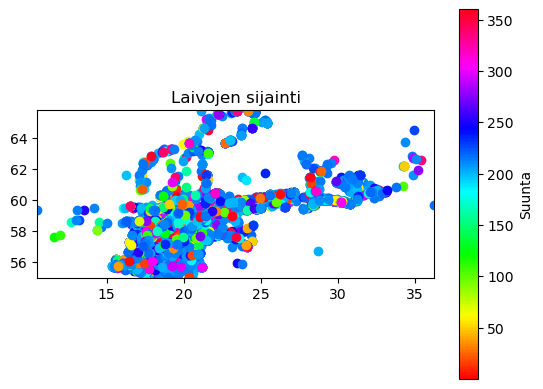

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pandas import json_normalize

df = pd.DataFrame(data)
df = json_normalize(df['features'])
df = df.rename(columns={'properties.timestamp': 'timestamp', 'properties.mmsi': 'mmsi', 'properties.navStat': 'navStat', 'properties.sog': 'sog', 'properties.cog': 'cog', 'properties.heading': 'heading', 'properties.imo': 'imo', 'properties.name': 'name', 'properties.callSign': 'callSign', 'properties.type': 'type', 'properties.a': 'a', 'properties.b': 'b', 'properties.c': 'c', 'properties.d': 'd', 'properties.draught': 'draught', 'properties.destination': 'destination', 'properties.eta': 'eta', 'properties.utcSecond': 'utcSecond'})

df = df[(df['cog'] > 0) & (df['cog'] < 360)]

df[['longitude', 'latitude']] = pd.DataFrame(df['geometry.coordinates'].tolist(), columns=['longitude', 'latitude'])

fig, ax = plt.subplots()
ax.set_xlim(min(df['longitude']), max(df['longitude']))
ax.set_ylim(min(df['latitude']), max(df['latitude']))

cog_min = min(df['cog'])
cog_max = max(df['cog'])
cmap = plt.get_cmap('hsv')
norm = mcolors.Normalize(vmin=cog_min, vmax=cog_max)

for index, row in df.iterrows():
    lon = row['longitude']
    lat = row['latitude']
    cog = row['cog']
    normalized_cog = norm(cog)
    color = cmap(normalized_cog)
    ax.plot(lon, lat, 'o', color=color)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Suunta')

plt.title('Laivojen sijainti')
ax.set_aspect('equal')

plt.show()
